# Create Dataset

## Create basic Params
Creating the basic dataset attributes.

In [1]:
folder_name = 'ikea_drill_screw'
TRAIN_COUNT = 800
VAL_COUNT = 200
IMAGE_SIZE = 512
INPUT_PATH = '../datasets/{}/input'.format(folder_name)
VAL_PATH = '../datasets/{}/val'.format(folder_name)
TRAIN_PATH = '../datasets/{}/train'.format(folder_name)
DI_PATH = INPUT_PATH + '/dataset_info.json'

## Create Training Set

In [2]:
MASK_DEF_PATH = TRAIN_PATH + '/mask_definitions.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {TRAIN_PATH} --count {TRAIN_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}

../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Create Validation Set

In [3]:
MASK_DEF_PATH = VAL_PATH + '/mask_definitions.json'
DI_PATH = INPUT_PATH + '/dataset_info.json'
#Generate the images
!python3 ../src/image_composition.py --input_dir {INPUT_PATH} --output_dir {VAL_PATH} --count {VAL_COUNT} --width {IMAGE_SIZE} --height {IMAGE_SIZE} --silent
#Generate the annotaions json
!python3 ../src/coco_json_utils.py -md {MASK_DEF_PATH} -di {DI_PATH}


../src/image_composition.py:197: UserWarning: file found in foregrounds directory (expected super-category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/.DS_Store
  warnings.warn(f'file found in foregrounds directory (expected super-category directories), ignoring: {super_category_dir}')
../src/image_composition.py:203: UserWarning: file found in super category directory (expected category directories), ignoring: ../datasets/ikea_drill_screw/input/foregrounds/instruments/.DS_Store
  warnings.warn(f'file found in super category directory (expected category directories), ignoring: {category_dir}')
../src/image_composition.py:212: UserWarning: foreground must be a .png file, skipping: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/.DS_Store
  warnings.warn(f'foreground must be a .png file, skipping: {str(image_file)}')
../src/image_composition.py:237: UserWarning: background must match an accepted type ['.png', '.jpg', '.jpeg'], ignoring: ../data

## Preview the generated datasets

In [4]:
import os
import sys
import numpy as np
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library
from src import coco_trainer
from mrcnn import visualize


dataset_train = coco_trainer.CocoLikeDataset()
dataset_train.load_data(TRAIN_PATH+'/coco_instances.json',TRAIN_PATH+'/images')
dataset_train.prepare()

dataset_val = coco_trainer.CocoLikeDataset()
dataset_val.load_data(VAL_PATH+'/coco_instances.json',VAL_PATH+'/images')
dataset_val.prepare()

Using TensorFlow backend.


Displaying examples from training dataset:


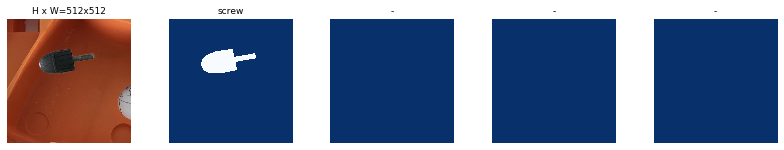

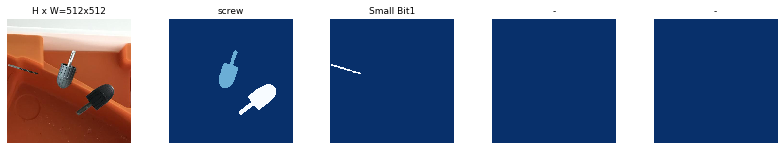

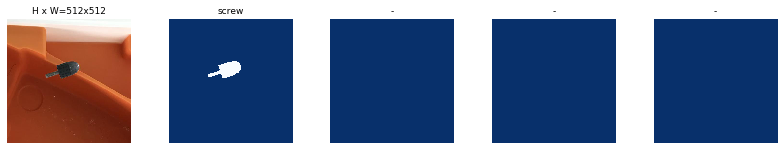

Displaying examples from validation dataset:


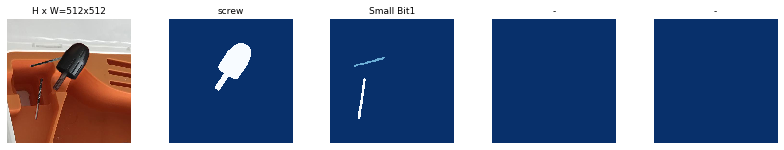

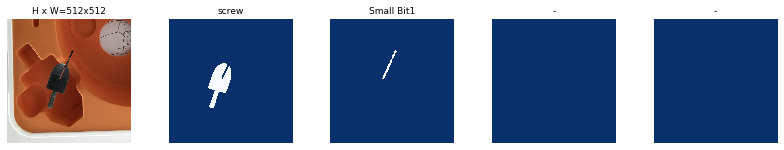

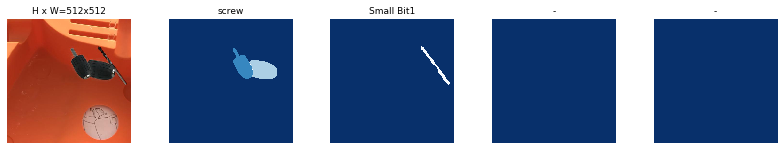

In [5]:
for name, dataset in [('training', dataset_train), ('validation', dataset_val)]:
    print(f'Displaying examples from {name} dataset:')
    
    image_ids = np.random.choice(dataset.image_ids, 3)
    for image_id in image_ids:
        image = dataset.load_image(image_id)
        mask, class_ids = dataset.load_mask(image_id)
        visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Sync to S3

In [6]:
!aws s3 sync ../datasets s3://dkitdatasets --delete

upload: ../datasets/.DS_Store to s3://dkitdatasets/.DS_Store                       
upload: ../datasets/ikea_drill_screw/.DS_Store to s3://dkitdatasets/ikea_drill_screw/.DS_Store
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_1079.png to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_1079.png
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_0202.png to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/Small Bit1/IMG_0202.png
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/IMG_0179.png to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/screw/IMG_0179.png
upload: ../datasets/ikea_drill_screw/input/foregrounds/instruments/screw/IMG_1035.png to s3://dkitdatasets/ikea_drill_screw/input/foregrounds/instruments/screw/IMG_1035.png
upload: ../datasets/ikea_drill_screw/train/.DS_Store to s3://dkitdatasets/ikea_drill_screw/train/.DS_Store
up

upload: ../datasets/ikea_drill_screw/train/images/00000051.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000051.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000050.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000050.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000054.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000054.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000055.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000055.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000056.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000056.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000057.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000057.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000060.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000060.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000058.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000115.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000115.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000121.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000121.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000124.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000124.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000123.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000123.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000125.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000125.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000126.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000126.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000128.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000128.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000127.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000189.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000189.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000180.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000180.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000190.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000190.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000192.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000192.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000194.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000194.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000197.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000197.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000193.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000193.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000200.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000256.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000256.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000254.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000254.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000258.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000258.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000259.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000259.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000266.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000266.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000257.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000257.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000267.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000267.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000264.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000330.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000330.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000325.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000325.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000331.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000331.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000328.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000328.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000332.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000332.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000329.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000329.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000334.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000334.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000327.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000395.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000395.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000392.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000392.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000394.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000394.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000397.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000397.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000398.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000398.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000345.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000345.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000403.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000403.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000401.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000464.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000464.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000450.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000450.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000466.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000466.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000451.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000451.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000462.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000462.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000465.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000465.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000461.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000461.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000468.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000528.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000528.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000526.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000526.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000529.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000529.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000531.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000531.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000530.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000530.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000527.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000527.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000536.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000536.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000533.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000592.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000592.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000591.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000591.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000596.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000596.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000593.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000593.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000599.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000599.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000597.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000597.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000590.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000590.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000562.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000657.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000657.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000659.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000659.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000660.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000660.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000661.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000661.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000598.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000598.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000658.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000658.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000666.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000666.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000662.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000722.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000722.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000724.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000724.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000726.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000726.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000728.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000728.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000725.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000725.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000727.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000727.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000674.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000674.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000723.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/images/00000787.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000787.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000790.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000790.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000791.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000791.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000785.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000785.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000792.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000792.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000793.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000793.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000789.jpg to s3://dkitdatasets/ikea_drill_screw/train/images/00000789.jpg
upload: ../datasets/ikea_drill_screw/train/images/00000788.jpg to s3://dkitdatasets/ikea_drill_screw/train/imag

upload: ../datasets/ikea_drill_screw/train/masks/00000056.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000056.png
upload: ../datasets/ikea_drill_screw/train/masks/00000060.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000060.png
upload: ../datasets/ikea_drill_screw/train/masks/00000063.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000063.png
upload: ../datasets/ikea_drill_screw/train/masks/00000058.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000058.png
upload: ../datasets/ikea_drill_screw/train/masks/00000059.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000059.png
upload: ../datasets/ikea_drill_screw/train/masks/00000065.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000065.png
upload: ../datasets/ikea_drill_screw/train/masks/00000061.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000061.png
upload: ../datasets/ikea_drill_screw/train/masks/00000062.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000062.png


upload: ../datasets/ikea_drill_screw/train/masks/00000128.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000128.png
upload: ../datasets/ikea_drill_screw/train/masks/00000125.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000125.png
upload: ../datasets/ikea_drill_screw/train/masks/00000129.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000129.png
upload: ../datasets/ikea_drill_screw/train/masks/00000123.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000123.png
upload: ../datasets/ikea_drill_screw/train/masks/00000130.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000130.png
upload: ../datasets/ikea_drill_screw/train/masks/00000132.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000132.png
upload: ../datasets/ikea_drill_screw/train/masks/00000131.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000131.png
upload: ../datasets/ikea_drill_screw/train/masks/00000124.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000124.png


upload: ../datasets/ikea_drill_screw/train/masks/00000188.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000188.png
upload: ../datasets/ikea_drill_screw/train/masks/00000186.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000186.png
upload: ../datasets/ikea_drill_screw/train/masks/00000195.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000195.png
upload: ../datasets/ikea_drill_screw/train/masks/00000194.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000194.png
upload: ../datasets/ikea_drill_screw/train/masks/00000196.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000196.png
upload: ../datasets/ikea_drill_screw/train/masks/00000192.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000192.png
upload: ../datasets/ikea_drill_screw/train/masks/00000198.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000198.png
upload: ../datasets/ikea_drill_screw/train/masks/00000193.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000193.png


upload: ../datasets/ikea_drill_screw/train/masks/00000264.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000264.png
upload: ../datasets/ikea_drill_screw/train/masks/00000263.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000263.png
upload: ../datasets/ikea_drill_screw/train/masks/00000265.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000265.png
upload: ../datasets/ikea_drill_screw/train/masks/00000260.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000260.png
upload: ../datasets/ikea_drill_screw/train/masks/00000266.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000266.png
upload: ../datasets/ikea_drill_screw/train/masks/00000261.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000261.png
upload: ../datasets/ikea_drill_screw/train/masks/00000257.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000257.png
upload: ../datasets/ikea_drill_screw/train/masks/00000267.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000267.png


upload: ../datasets/ikea_drill_screw/train/masks/00000337.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000337.png
upload: ../datasets/ikea_drill_screw/train/masks/00000332.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000332.png
upload: ../datasets/ikea_drill_screw/train/masks/00000336.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000336.png
upload: ../datasets/ikea_drill_screw/train/masks/00000341.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000341.png
upload: ../datasets/ikea_drill_screw/train/masks/00000335.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000335.png
upload: ../datasets/ikea_drill_screw/train/masks/00000339.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000339.png
upload: ../datasets/ikea_drill_screw/train/masks/00000334.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000334.png
upload: ../datasets/ikea_drill_screw/train/masks/00000338.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000338.png


upload: ../datasets/ikea_drill_screw/train/masks/00000404.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000404.png
upload: ../datasets/ikea_drill_screw/train/masks/00000406.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000406.png
upload: ../datasets/ikea_drill_screw/train/masks/00000407.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000407.png
upload: ../datasets/ikea_drill_screw/train/masks/00000409.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000409.png
upload: ../datasets/ikea_drill_screw/train/masks/00000405.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000405.png
upload: ../datasets/ikea_drill_screw/train/masks/00000410.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000410.png
upload: ../datasets/ikea_drill_screw/train/masks/00000412.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000412.png
upload: ../datasets/ikea_drill_screw/train/masks/00000399.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000399.png


upload: ../datasets/ikea_drill_screw/train/masks/00000465.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000465.png
upload: ../datasets/ikea_drill_screw/train/masks/00000471.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000471.png
upload: ../datasets/ikea_drill_screw/train/masks/00000468.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000468.png
upload: ../datasets/ikea_drill_screw/train/masks/00000470.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000470.png
upload: ../datasets/ikea_drill_screw/train/masks/00000475.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000475.png
upload: ../datasets/ikea_drill_screw/train/masks/00000472.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000472.png
upload: ../datasets/ikea_drill_screw/train/masks/00000473.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000473.png
upload: ../datasets/ikea_drill_screw/train/masks/00000476.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000476.png


upload: ../datasets/ikea_drill_screw/train/masks/00000541.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000541.png
upload: ../datasets/ikea_drill_screw/train/masks/00000542.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000542.png
upload: ../datasets/ikea_drill_screw/train/masks/00000543.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000543.png
upload: ../datasets/ikea_drill_screw/train/masks/00000540.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000540.png
upload: ../datasets/ikea_drill_screw/train/masks/00000547.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000547.png
upload: ../datasets/ikea_drill_screw/train/masks/00000545.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000545.png
upload: ../datasets/ikea_drill_screw/train/masks/00000552.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000552.png
upload: ../datasets/ikea_drill_screw/train/masks/00000544.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000544.png


upload: ../datasets/ikea_drill_screw/train/masks/00000613.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000613.png
upload: ../datasets/ikea_drill_screw/train/masks/00000605.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000605.png
upload: ../datasets/ikea_drill_screw/train/masks/00000608.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000608.png
upload: ../datasets/ikea_drill_screw/train/masks/00000615.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000615.png
upload: ../datasets/ikea_drill_screw/train/masks/00000616.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000616.png
upload: ../datasets/ikea_drill_screw/train/masks/00000618.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000618.png
upload: ../datasets/ikea_drill_screw/train/masks/00000620.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000620.png
upload: ../datasets/ikea_drill_screw/train/masks/00000614.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000614.png


upload: ../datasets/ikea_drill_screw/train/masks/00000679.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000679.png
upload: ../datasets/ikea_drill_screw/train/masks/00000688.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000688.png
upload: ../datasets/ikea_drill_screw/train/masks/00000684.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000684.png
upload: ../datasets/ikea_drill_screw/train/masks/00000681.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000681.png
upload: ../datasets/ikea_drill_screw/train/masks/00000673.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000673.png
upload: ../datasets/ikea_drill_screw/train/masks/00000685.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000685.png
upload: ../datasets/ikea_drill_screw/train/masks/00000689.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000689.png
upload: ../datasets/ikea_drill_screw/train/masks/00000687.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000687.png


upload: ../datasets/ikea_drill_screw/train/masks/00000748.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000748.png
upload: ../datasets/ikea_drill_screw/train/masks/00000755.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000755.png
upload: ../datasets/ikea_drill_screw/train/masks/00000752.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000752.png
upload: ../datasets/ikea_drill_screw/train/masks/00000751.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000751.png
upload: ../datasets/ikea_drill_screw/train/masks/00000753.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000753.png
upload: ../datasets/ikea_drill_screw/train/masks/00000754.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000754.png
upload: ../datasets/ikea_drill_screw/train/masks/00000760.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000760.png
upload: ../datasets/ikea_drill_screw/train/masks/00000759.png to s3://dkitdatasets/ikea_drill_screw/train/masks/00000759.png


upload: ../datasets/ikea_drill_screw/val/images/00000021.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000021.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000018.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000018.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000023.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000023.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000025.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000025.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000028.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000028.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000026.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000026.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000015.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000015.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000027.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000027.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000087.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000087.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000085.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000085.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000089.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000089.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000092.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000092.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000088.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000088.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000091.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000091.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000094.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000094.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000097.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000097.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/images/00000166.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000166.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000163.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000163.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000160.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000160.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000165.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000165.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000162.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000162.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000168.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000168.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000173.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000173.jpg
upload: ../datasets/ikea_drill_screw/val/images/00000170.jpg to s3://dkitdatasets/ikea_drill_screw/val/images/00000170.jpg
upload: ../datas

upload: ../datasets/ikea_drill_screw/val/masks/00000032.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000032.png
upload: ../datasets/ikea_drill_screw/val/masks/00000034.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000034.png
upload: ../datasets/ikea_drill_screw/val/masks/00000030.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000030.png
upload: ../datasets/ikea_drill_screw/val/masks/00000035.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000035.png
upload: ../datasets/ikea_drill_screw/val/masks/00000036.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000036.png
upload: ../datasets/ikea_drill_screw/val/masks/00000033.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000033.png
upload: ../datasets/ikea_drill_screw/val/masks/00000041.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000041.png
upload: ../datasets/ikea_drill_screw/val/masks/00000038.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000038.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000101.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000101.png
upload: ../datasets/ikea_drill_screw/val/masks/00000099.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000099.png
upload: ../datasets/ikea_drill_screw/val/masks/00000103.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000103.png
upload: ../datasets/ikea_drill_screw/val/masks/00000102.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000102.png
upload: ../datasets/ikea_drill_screw/val/masks/00000105.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000105.png
upload: ../datasets/ikea_drill_screw/val/masks/00000109.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000109.png
upload: ../datasets/ikea_drill_screw/val/masks/00000107.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000107.png
upload: ../datasets/ikea_drill_screw/val/masks/00000110.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000110.png
upload: ../datasets/ikea_drill_s

upload: ../datasets/ikea_drill_screw/val/masks/00000175.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000175.png
upload: ../datasets/ikea_drill_screw/val/masks/00000182.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000182.png
upload: ../datasets/ikea_drill_screw/val/masks/00000186.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000186.png
upload: ../datasets/ikea_drill_screw/val/masks/00000181.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000181.png
upload: ../datasets/ikea_drill_screw/val/masks/00000177.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000177.png
upload: ../datasets/ikea_drill_screw/val/masks/00000178.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000178.png
upload: ../datasets/ikea_drill_screw/val/masks/00000184.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000184.png
upload: ../datasets/ikea_drill_screw/val/masks/00000183.png to s3://dkitdatasets/ikea_drill_screw/val/masks/00000183.png
upload: ../datasets/ikea_drill_s